# 14: 量子トンネル効果の実験

In [1]:
from renom_q import *
import math

量子トンネル効果とは、古典力学的には乗り越えられないはずのポテンシャル障壁を、粒子があたかもトンネルを抜けたかのように通過する量子力学的現象である。
量子トンネル実験の様子は量子ゲートでシミュレーションを行うことができ、量子の存在確率がエネルギーのポテンシャル障壁を貫通して移動する様子が確認できる。

長方形の井戸型ポテンシャルのある一次元空間で移動できる単一電子のシュレディンガー方程式は次のように表せる。$H$はハミルトニアンであり系全体のエネルギーとし、運動エネルギー$K$とポテンシャル障壁のポテンシャルエネルギー$V$との和とする。

$$i \hbar \frac{\partial}{\partial t}\left| \psi \right\rangle = H \left| \psi \right\rangle = (K + V) \left| \psi \right\rangle$$

簡単のために$\hbar=1$と仮定する。状態ベクトルが時間に依存し、ハミルトニアンが時間に依存しない時のシュレディンガー方程式を解くと次のようになる。

\begin{eqnarray}
\int^t_0{\frac{d\left| \psi(t) \right\rangle}{\left| \psi(t) \right\rangle}}&=&\int^t_0{-iHdt} \\
\log{\frac{\left| \psi(t) \right\rangle}{\left| \psi(0) \right\rangle}}&=&-iHt \\
\left| \psi(t) \right\rangle&=&e^{-iHt}\left| \psi(0) \right\rangle \\
\end{eqnarray}

よって、シュレディンガー方程式は次のユニタリ変換を受けることで、初期状態$\left| \psi(0) \right\rangle$から終状態$\left| \psi(t) \right\rangle$へと時間発展する。

$$U(t)=e^{\displaystyle -iHt} =e^{\displaystyle -i(K + V)t}$$

この式を鈴木トロッター分解により次のように近似する。

$$U(t)=e^{\displaystyle -i(K + V)t} \approx \left( e^{\displaystyle -iK\Delta t} \cdot e^{\displaystyle -iV\Delta t} \right)^{\frac{t}{\Delta t}}$$

すると運動エネルギー$K$のユニタリ変換$e^{-iK\Delta t}$と、ポテンシャルエネルギー$V$のユニタリ変換$e^{-iV\Delta t}$に分離できる。2量子ビットでのシミュレーションにおける、運動エネルギー$K$のユニタリ変換$e^{-iK\Delta t}$はフーリエ変換$F$を用いて次のように表せる。

$$e^{\displaystyle -iK\Delta t} = FDF^{\dagger} = F \left( e^{\displaystyle -iT\Delta t} \right) F^{\dagger}$$

$$D = e^{\displaystyle -iT\Delta t} = e^{\displaystyle -i\frac{\pi^2}{4}
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}
\Delta t} $$

$T$は対角成分が$k^2/2m$($k$はフーリエモードの波数)となる対角行列である。また、$D$は量子コンピュータの既存の量子ゲートであるユニタリ回転ゲート$U_1$と制御位相回転ゲート$cU_1$を組み合わせて実装することができる。

\begin{eqnarray} 
&& cU_1(\pi^2 \Delta t) \left( U_1 \left( -\frac{\pi^2}{4}\Delta t \right) \otimes I \right) \left( I \otimes U_1 \left( -\pi^2 \Delta t \right) \right) \nonumber \\
&&= e^{\displaystyle -i\frac{\pi^2}{2}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}
\Delta t} \cdot
e^{\displaystyle i\frac{\pi^2}{8}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}
\Delta t} \cdot
e^{\displaystyle i\frac{\pi^2}{2}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}
\Delta t}  \nonumber \\
&&= e^{\displaystyle -i\frac{\pi^2}{4}
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}
\Delta t} 
\end{eqnarray}

また、ポテンシャルエネルギー$V$のユニタリ変換$e^{-iV\Delta t}$は、障壁の高さのパラメータである$v$と、位相反転演算$Z$を用いて次のように表せる。

$$e^{\displaystyle -iV\Delta t} = e^{\displaystyle -ivZ\Delta t} $$

よって、障壁の高さのパラメータ$v$が10であるとすると、ユニタリ変換$e^{-iV\Delta t}$が適用された量子ビットが$\left| 0 \right\rangle$の状態ではポテンシャル障壁になり、$\left| 1 \right\rangle$の状態では井戸型ポテンシャルの底になる。また、障壁の高さのパラメータ$v$が0であるとすると、ポテンシャル障壁はなくなり、波動関数は拡散される。

たとえば、2量子ビットの下位ビットに対してユニタリ変換$e^{-iV\Delta t}$を行い、障壁の高さのパラメータ$v$を10に設定すると、下位ビットが$\left| 0 \right\rangle$の状態ではポテンシャル障壁になり、$\left| 1 \right\rangle$の状態では井戸型ポテンシャルの底になる。

<img src='images/tunnelling.png' width=30%>

量子トンネル効果シミュレーションの量子回路は、運動エネルギー$K$のユニタリ変換$e^{-iK\Delta t}$である$F,\ D,\ F^{\dagger}$と、ポテンシャルエネルギー$V$のユニタリ変換$e^{-iV\Delta t}$である$P$を1セットとし、$t=\Delta t$の状態を$FDF^{\dagger}P$の1セットで表すことができる。

## 14-1: ポテンシャル障壁がある場合

In [2]:
def qft2(qci, q1, q2):
    qci.h(q1)
    qci.cu1(math.pi/2, q1, q2)
    qci.h(q2)
def D(qci, q1, q2):
    qci.u1(-(math.pi**2)/10, q1)
    qci.u1(-(math.pi**2)/40, q2)
    qci.cu1((math.pi**2)/10, q2, q1)
def iqft2(qci, q1, q2):
    qci.h(q2)
    qci.cu1(-math.pi/2, q1, q2)
    qci.h(q1)
def fdfp(qci, q1, q2, v):
    qft2(qci, q1, q2)
    qci.barrier()
    D(qci, q1, q2)
    qci.barrier()
    iqft2(qci, q1, q2)
    qci.barrier()
    qci.u1(v, q2)

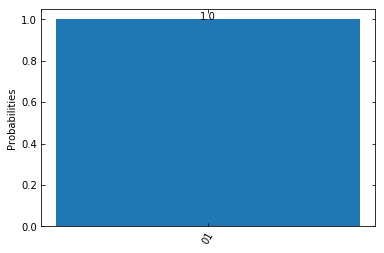

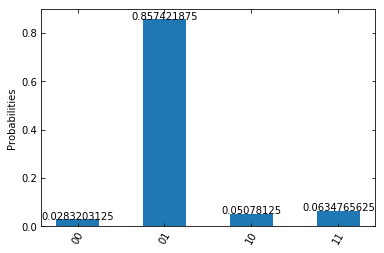

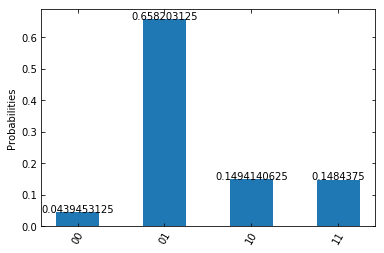

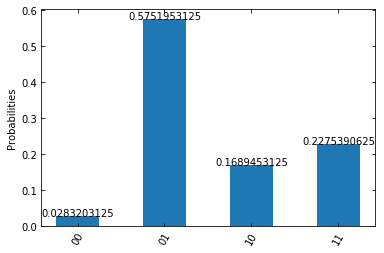

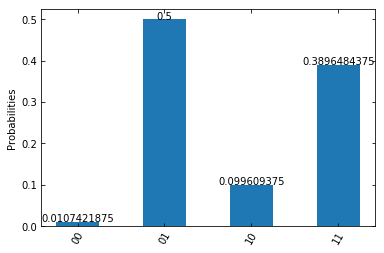

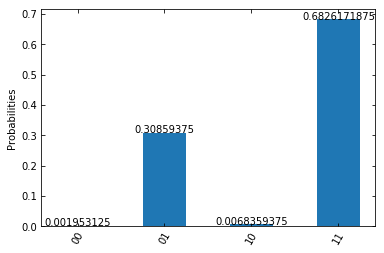

In [3]:
ns = 2
rep = 6

for re in range(0, rep):
    q = QuantumRegister(ns)
    c = ClassicalRegister(ns)
    qc = QuantumCircuit(q, c)
    qc.x(q[1])
    for _ in range(0, re):
        qc.barrier()
        fdfp(qc, q[0], q[1], 1)
    for n in range(0, ns):
        qc.measure(q[n], c[n])
    r = execute(qc)
    plot_histogram(r)
    #draw_circuit(qc)

## 14-1: ポテンシャル障壁がない場合

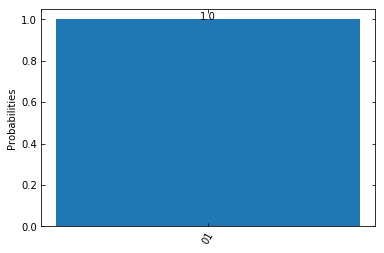

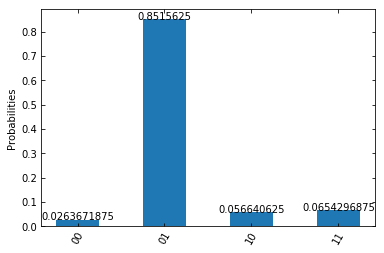

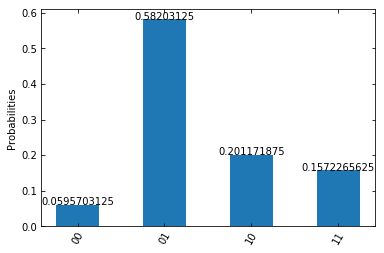

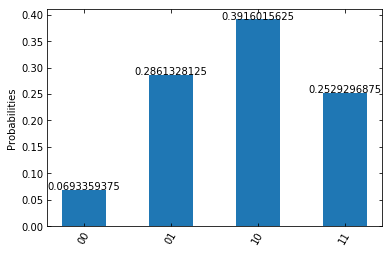

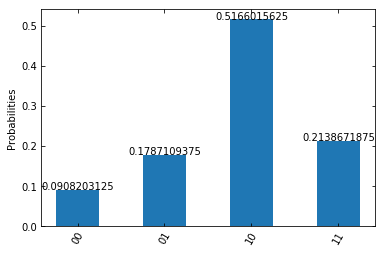

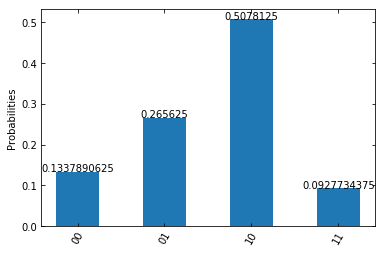

In [4]:
ns = 2
rep = 6

for re in range(0, rep):
    q = QuantumRegister(ns)
    c = ClassicalRegister(ns)
    qc = QuantumCircuit(q, c)
    qc.x(q[1])
    for _ in range(0, re):
        qc.barrier()
        fdfp(qc, q[0], q[1], 0.0)
    for n in range(0, ns):
        qc.measure(q[n], c[n])
    r = execute(qc)
    plot_histogram(r)
    #draw_circuit(qc)

## 参考文献

Andrew T. Sornborger, ”Quantum Simulation of Tunneling in Small Systems,” Scientific Reports, 2, 597, 2012.  
https://arxiv.org/abs/1202.1536